# (TASK01) 데이터 전처리
- 원본 파일에서 'text'칼럼과 'label'칼럼만 활용

In [1]:
# 시각화 함수
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def analyze_dataset(json_file):
    data = load_data(json_file)
    print(f"총 데이터 수: {len(data)}")

    # 멀티라벨 조합 (정렬된 튜플로)
    label_combinations = [tuple(sorted(item['label'])) for item in data]
    combo_counts = Counter(label_combinations)

    # 출력: 멀티라벨 조합별 분포 (내림차순 정렬)
    print("\n📊 멀티라벨 조합별 분포:")
    sorted_combos = sorted(combo_counts.items(), key=lambda x: x[1], reverse=True)
    for combo, count in sorted_combos:
        print(f"{list(combo)}: {count}")

    # 시각화 : 
    combo_labels = [", ".join(combo) for combo, _ in sorted_combos]
    counts = [count for _, count in sorted_combos]

    plt.figure(figsize=(12, max(6, len(combo_labels) * 0.35)))
    sns.barplot(x=counts, y=combo_labels, palette='magma')
    plt.xlabel("Count")
    plt.ylabel("Label Combination")
    plt.title("Label Combination Distribution")
    plt.tight_layout()
    plt.show()

    # 전체 유니크 라벨 목록
    label_set = set()
    for item in data:
        for label in item['label']:
            label_set.add(label.strip())

    label_list = sorted(list(label_set))

    print(f"\n🏷️ 전체 라벨 목록 ({len(label_list)}개):")
    for i, label in enumerate(label_list, 1):
        print(f"{i:2d}. {label}")


    print(f"\n🏷️ 텍스트의 길이 분포 :")
    lengths = [len(item['text']) for item in data]
    plt.figure(figsize=(10,5))
    sns.histplot(lengths, bins=50)
    plt.title("Text Length Distribution (characters)")
    plt.xlabel("Text length")
    plt.ylabel("Count")
    plt.show()

In [2]:
import json
import os
import re

# ✅ 라벨 정규화 함수
def normalize_labels(label_list):
    return [label.strip().lower().capitalize() for label in label_list]

# ✅ 전처리 함수
def preprocess(data):
    processed = []
    for item in data:
        input_text = item.get("input", "")
        output_labels = item.get("output", "")
        label_list = [label.strip() for label in output_labels.split(" or ")]
        label_list = normalize_labels(label_list)  # 🎯 정규화 적용
        processed.append({
            "text": input_text,
            "label": label_list
        })
    return processed

# ✅ 파일 로딩 함수 (test용 기준으로 작성된 코드임: test_ 시작 + _p1/_p3로 끝)
def load_and_preprocess_all(data_dir='./data', p_versions=['p1', 'p3']):
    all_data = []
    pattern = re.compile(r'^test_.*_(' + '|'.join(p_versions) + r')\.json$')               #### train or test

    for file_name in os.listdir(data_dir):
        if pattern.match(file_name):
            file_path = os.path.join(data_dir, file_name)
            print(f"📂 로딩 중: {file_path}")

            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    processed = preprocess(data)
                    all_data.extend(processed)
            except Exception as e:
                print(f"❌ 오류 발생 - {file_name}: {e}")

    print(f"\n✅ 전처리 완료: 총 샘플 수 {len(all_data)}개")
    return all_data


In [3]:
merged_data = load_and_preprocess_all(data_dir='./data/new')

json_file = './data/merged/test_task01_merged.json'
with open(json_file, 'w', encoding='utf-8') as f:
    json.dump(merged_data, f, ensure_ascii=False, indent=4)

📂 로딩 중: ./data/new/test_waam_cls_p1.json
📂 로딩 중: ./data/new/test_waam_cls_p3.json

✅ 전처리 완료: 총 샘플 수 56개


총 데이터 수: 56

📊 멀티라벨 조합별 분포:
['Normal']: 26
['Humping']: 16
['Balling']: 6
['Lack of fusion']: 2
['Bead cut', 'Humping']: 2
['Discontinuity', 'Humping']: 2
['Balling', 'Bead cut']: 2


/tmp/ipykernel_1746466/1892701875.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=combo_labels, palette='magma')


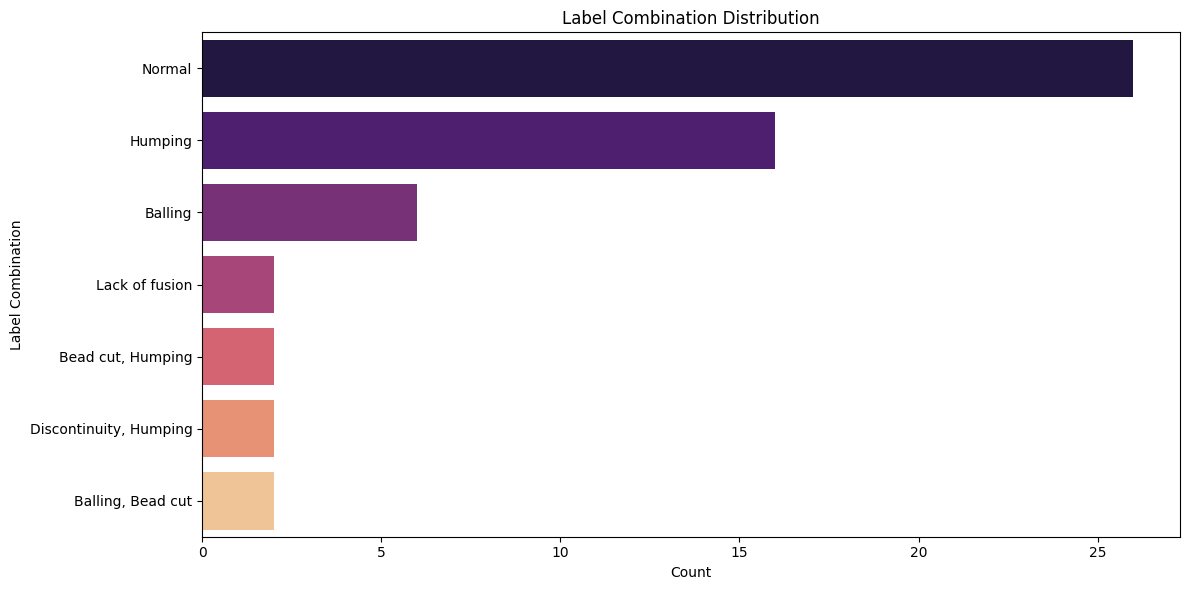


🏷️ 전체 라벨 목록 (6개):
 1. Balling
 2. Bead cut
 3. Discontinuity
 4. Humping
 5. Lack of fusion
 6. Normal

🏷️ 텍스트의 길이 분포 :


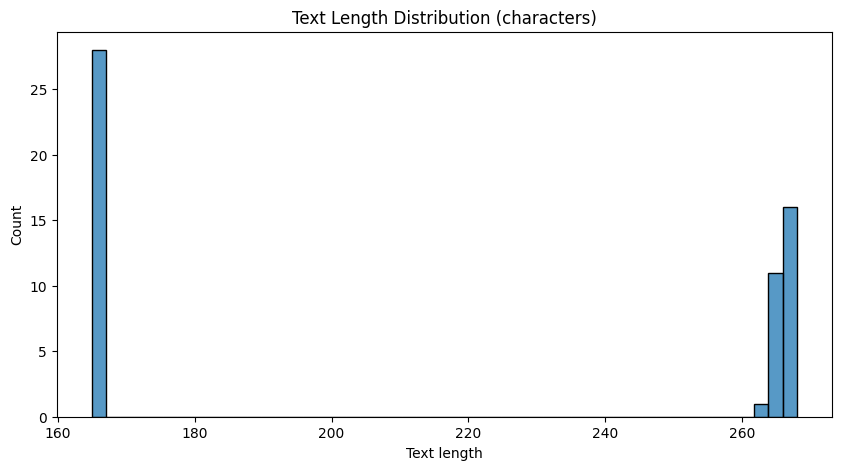

In [4]:
analyze_dataset(json_file)

In [5]:
from collections import Counter
from itertools import chain

def get_label_distribution(data):
    # 라벨 조합 기준으로 count (멀티라벨도 하나의 조합으로 취급)
    label_counter = Counter(
        tuple(sorted(label)) for label in [item['label'] for item in data]
    )
    return label_counter

def compare_label_distributions(train_data, test_data):
    train_dist = get_label_distribution(train_data)
    test_dist = get_label_distribution(test_data)

    all_keys = set(train_dist.keys()).union(test_dist.keys())
    print(f"\n📊 클래스 분포 비교 (조합 기준):\n{'Label combination':50} | Train | Test")
    print("-" * 75)
    for label_combo in sorted(all_keys):
        label_str = ', '.join(label_combo)
        train_count = train_dist.get(label_combo, 0)
        test_count = test_dist.get(label_combo, 0)
        print(f"{label_str:50} | {train_count:5} | {test_count:4}")


In [6]:
train_file = './data/merged/train_task01_merged.json'
test_file = './data/merged/test_task01_merged.json'

with open(train_file, 'r', encoding='utf-8') as f:
    train_raw = json.load(f)

with open(test_file, 'r', encoding='utf-8') as f:
    test_raw = json.load(f)


compare_label_distributions(train_raw, test_raw)


📊 클래스 분포 비교 (조합 기준):
Label combination                                  | Train | Test
---------------------------------------------------------------------------
Balling                                            |    16 |    6
Balling, Bead cut                                  |     2 |    2
Balling, Discontinuity                             |     2 |    0
Bead cut                                           |     2 |    0
Bead cut, Humping                                  |     2 |    2
Discontinuity, Humping                             |     2 |    2
Humping                                            |    64 |   16
Lack of fusion                                     |    12 |    2
Normal                                             |   122 |   26


# (TASK01) 데이터 확인
- 이진분류 확인용

In [7]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def analyze_normal_vs_abnormal(json_file):
    data = load_data(json_file)
    
    # 정상(1) / 비정상(0) 분류
    binary_labels = []
    for item in data:
        if "Normal" in item["label"]:
            binary_labels.append(1)  # 정상
        else:
            binary_labels.append(0)  # 비정상

    # 분포 확인
    counter = Counter(binary_labels)
    print("\n✅ 정상/비정상 분포:")
    print(f"정상 (Normal 포함): {counter[1]}")
    print(f"비정상 (Normal 없음): {counter[0]}")

    # 시각화
    plt.figure(figsize=(6, 4))
    sns.barplot(x=["Abnormal", "Normal"], y=[counter[0], counter[1]], palette="Set2")
    plt.title("Normal vs Abnormal Class Distribution")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [8]:
json_file = './data/train/task01_merged.json'
analyze_normal_vs_abnormal(json_file)

FileNotFoundError: [Errno 2] No such file or directory: './data/train/task01_merged.json'

---

task02 전처리

In [2]:
import json
import os
import re

def extract_number(text):
    import re
    match = re.search(r"[-+]?\d*\.\d+|\d+", text)
    return match.group() if match else ""

def preprocess_and_merge_auto(data_dir='./data/new', output_dir='./data/merged'):
    # 패턴: train_ 또는 test_ 시작 + _p5.json or _p7.json 끝
    pattern = re.compile(r'^(train|test)_.*_(p5|p7)\.json$')

    # 파일 리스트 분리
    train_files = []
    test_files = []

    for file_name in os.listdir(data_dir):
        if pattern.match(file_name):
            full_path = os.path.join(data_dir, file_name)
            if file_name.startswith('train_'):
                train_files.append(full_path)
            elif file_name.startswith('test_'):
                test_files.append(full_path)

    def process_files(file_list, save_path):
        merged = []
        for file_path in file_list:
            print(f"📂 처리 중: {file_path}")
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            for item in data:
                input_text = item.get("input", "")
                output_text = extract_number(item.get("output", ""))
                merged.append({"text": input_text, "output": output_text})

        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        with open(save_path, 'w', encoding='utf-8') as f:
            json.dump(merged, f, ensure_ascii=False, indent=4)
        print(f"✅ 저장 완료: {save_path} (총 {len(merged)}개 샘플)")

    # train, test 각각 처리
    process_files(train_files, os.path.join(output_dir, 'train_task02_merged.json'))
    process_files(test_files, os.path.join(output_dir, 'test_task02_merged.json'))


# 실행
preprocess_and_merge_auto()

📂 처리 중: ./data/new/train_waam_pred_hi_p5.json
📂 처리 중: ./data/new/train_waam_pred_hi_p7.json
✅ 저장 완료: ./data/merged/train_task02_merged.json (총 224개 샘플)
📂 처리 중: ./data/new/test_waam_pred_hi_p7.json
📂 처리 중: ./data/new/test_waam_pred_hi_p5.json
✅ 저장 완료: ./data/merged/test_task02_merged.json (총 56개 샘플)


In [3]:
import json
import os
import re

def extract_number(text):
    import re
    match = re.search(r"[-+]?\d*\.\d+|\d+", text)
    return match.group() if match else ""

def preprocess_and_merge_auto(data_dir='./data/new', output_dir='./data/merged'):
    # 패턴: train_ 또는 test_ 시작 + _p5.json or _p7.json 끝
    pattern = re.compile(r'^(train|test)_.*_(p9)\.json$')

    # 파일 리스트 분리
    train_files = []
    test_files = []

    for file_name in os.listdir(data_dir):
        if pattern.match(file_name):
            full_path = os.path.join(data_dir, file_name)
            if file_name.startswith('train_'):
                train_files.append(full_path)
            elif file_name.startswith('test_'):
                test_files.append(full_path)

    def process_files(file_list, save_path):
        merged = []
        for file_path in file_list:
            print(f"📂 처리 중: {file_path}")
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            for item in data:
                input_text = item.get("input", "")
                output_text = extract_number(item.get("output", ""))
                merged.append({"text": input_text, "output": output_text})

        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        with open(save_path, 'w', encoding='utf-8') as f:
            json.dump(merged, f, ensure_ascii=False, indent=4)
        print(f"✅ 저장 완료: {save_path} (총 {len(merged)}개 샘플)")

    # train, test 각각 처리
    process_files(train_files, os.path.join(output_dir, 'train_task02_e_merged.json'))
    process_files(test_files, os.path.join(output_dir, 'test_task02_e_merged.json'))


# 실행
preprocess_and_merge_auto()

📂 처리 중: ./data/new/train_waam_pred_hi_p9.json
✅ 저장 완료: ./data/merged/train_task02_e_merged.json (총 112개 샘플)
📂 처리 중: ./data/new/test_waam_pred_hi_p9.json
✅ 저장 완료: ./data/merged/test_task02_e_merged.json (총 28개 샘플)


---

In [5]:
import json
from sklearn.model_selection import train_test_split

# 1. JSON 파일 로드
with open("./data/merged/train_task02_merged.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 2. 80% train, 20% val로 랜덤 분할 (random_state 고정)
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# 3. 각각 저장
with open("./data/merged/train_task02_merged_train.json", "w", encoding="utf-8") as f:
    json.dump(train_data, f, ensure_ascii=False, indent=2)

with open("./data/merged/train_task02_merged_train_val.json", "w", encoding="utf-8") as f:
    json.dump(val_data, f, ensure_ascii=False, indent=2)

print(f"Train samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")


Train samples: 179
Validation samples: 45


In [6]:
import json
from sklearn.model_selection import train_test_split

# 1. JSON 파일 로드
with open("./data/merged/train_task02_e_merged.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 2. 80% train, 20% val로 랜덤 분할 (random_state 고정)
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# 3. 각각 저장
with open("./data/merged/train_task02_e_merged_train.json", "w", encoding="utf-8") as f:
    json.dump(train_data, f, ensure_ascii=False, indent=2)

with open("./data/merged/train_task02_e_merged_train_val.json", "w", encoding="utf-8") as f:
    json.dump(val_data, f, ensure_ascii=False, indent=2)

print(f"Train samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")


Train samples: 89
Validation samples: 23


---

In [ ]:

from transformers import TrainingArguments
import inspect

print(inspect.signature(TrainingArguments))

# pip show transformers
# Version: 4.52.4

(output_dir: Optional[str] = None, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, eval_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: Optional[float] = 0, torch_empty_cache_steps: Optional[int] = None, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -1, lr_scheduler_type: Union[transformers.trainer_utils.SchedulerType, str] = 'linear', lr_scheduler_kwargs: Union[dict, str, NoneType] = <factory>, warmup_ratio: float = 0.0, warmup_steps: in